In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/sameeg'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("incognitoalpha/EEGNEW")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/EEGNEW


In [15]:
import pandas as pd
import os

# Load the training CSV
df = pd.read_csv('/kaggle/input/EEGNEW/trainnew.csv')

# Display basic info
print(df.head())
print(df.columns)

df1 = pd.read_csv('/kaggle/input/EEGNEW/testnew.csv')

# Display basic info
print(df1.head())
print(df1.columns)

df.drop(['eeg_sub_id','eeg_label_offset_seconds','spectrogram_label_offset_seconds','label_id'], axis=1, inplace=True)
df1.drop(['eeg_sub_id','eeg_label_offset_seconds','spectrogram_label_offset_seconds','label_id'], axis=1, inplace=True)

print(df.head())
print(df.columns)

print(df1.head())
print(df1.columns)



       eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
0  3589244749           0                         0        10381291   
1  3589244749           1                         2        10381291   
2   736446371           0                         0        10397461   
3   688312769           0                         0        10397461   
4  1768958569           0                         0        10397461   

   spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
0                   0                                 0  3587168508   
1                   1                                 2  1308633558   
2                   0                                 0  2926135348   
3                   1                               528  2971910547   
4                   2                               746  1943001855   

   patient_id expert_consensus  seizure_vote  lpd_vote  gpd_vote  lrda_vote  \
0       22655            Other             0         0         0   

In [16]:
print(df.head())
print(df.columns)

       eeg_id  spectrogram_id  spectrogram_sub_id  patient_id  \
0  3589244749        10381291                   0       22655   
1  3589244749        10381291                   1       22655   
2   736446371        10397461                   0       29441   
3   688312769        10397461                   1       29441   
4  1768958569        10397461                   2       29441   

  expert_consensus  seizure_vote  lpd_vote  gpd_vote  lrda_vote  grda_vote  \
0            Other             0         0         0          1          0   
1            Other             0         0         0          1          0   
2              LPD             0         1         0          0          0   
3              LPD             0         1         0          0          0   
4              LPD             0         7         3          0          0   

   other_vote  
0           2  
1           2  
2           0  
3           0  
4           1  
Index(['eeg_id', 'spectrogram_id', 'spectrog

In [18]:
import os

# List all folders under /kaggle/input
print("Top-level folders in /kaggle/input:")
print(os.listdir('/kaggle/input'))

# List contents of SAMEEG dataset folder
print("\nContents of EEGNEW folder:")
print(os.listdir('/kaggle/input/EEGNEW'))


Top-level folders in /kaggle/input:
['sameeg', 'EEGNEW']

Contents of EEGNEW folder:
['train_spectrograms', 'test_spectograms', 'trainnew.csv', 'testnew.csv']


Enter the full path to the parquet files directory:  /kaggle/input/EEGNEW/train_spectrograms


Loading CSV...
Found 5349 valid spectrograms with parquet files.


Enter one or more spectrogram IDs separated by commas:  10381291



Spectrogram ID: 10381291
Expert Consensus: Other


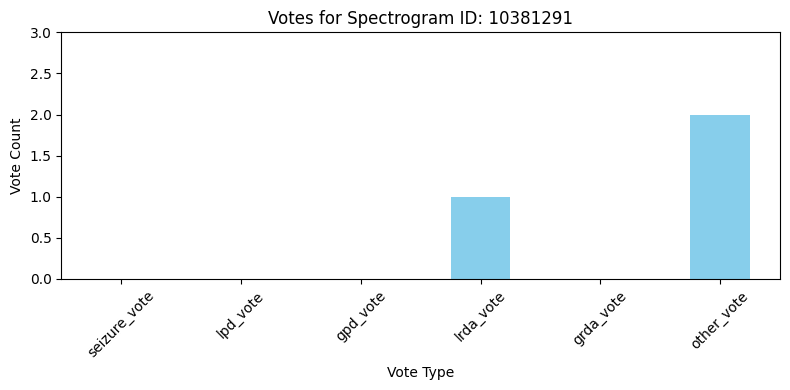


Spectrogram ID: 10381291
Expert Consensus: Other


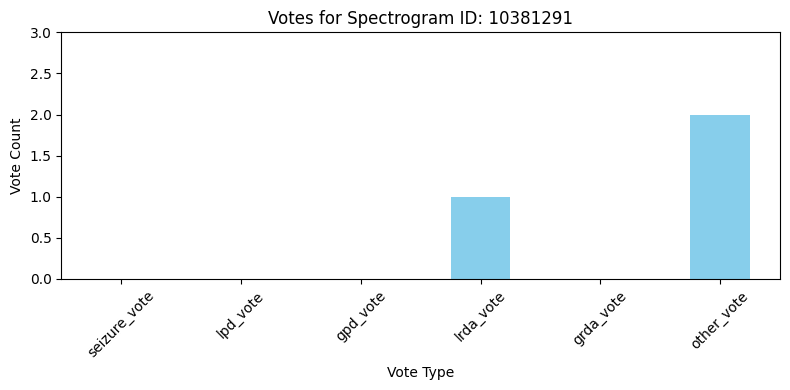

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt

class EEGSpectrogramAnalyzer:
    def __init__(self):
        self.df = None

    def load_data(self, csv_path, parquet_dir):
        print("Loading CSV...")
        self.df = pd.read_csv(csv_path)
        self.df['spectrogram_id'] = self.df['spectrogram_id'].astype(str)
        
        # Map spectrogram_id to parquet file path
        self.df['spectrogram_path'] = self.df['spectrogram_id'].apply(
            lambda x: os.path.join(parquet_dir, f"{x}.parquet")
        )

        # Filter to only rows where parquet file exists
        self.df = self.df[self.df['spectrogram_path'].apply(os.path.exists)].reset_index(drop=True)
        print(f"Found {len(self.df)} valid spectrograms with parquet files.")

    def show_votes_and_consensus_for_ids(self, spectrogram_ids):
        vote_columns = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']

        # Filter dataframe to rows matching input IDs
        filtered_df = self.df[self.df['spectrogram_id'].isin(spectrogram_ids)]

        if filtered_df.empty:
            print("No matching spectrogram IDs found in the data.")
            return

        for idx, row in filtered_df.iterrows():
            spect_id = row['spectrogram_id']
            expert_consensus = row['expert_consensus']
            votes = row[vote_columns]

            print(f"\nSpectrogram ID: {spect_id}")
            print(f"Expert Consensus: {expert_consensus}")

            plt.figure(figsize=(8, 4))
            votes.plot(kind='bar', color='skyblue')
            plt.title(f"Votes for Spectrogram ID: {spect_id}")
            plt.ylabel('Vote Count')
            plt.xlabel('Vote Type')
            plt.xticks(rotation=45)
            plt.ylim(0, votes.max() + 1)
            plt.tight_layout()
            plt.show()

    def run(self):
        csv_path = '/kaggle/input/EEGNEW/trainnew.csv'
        parquet_dir = input("Enter the full path to the parquet files directory: ").strip()

        if not os.path.isfile(csv_path):
            print(f"Error: CSV file not found at {csv_path}")
            return
        if not os.path.isdir(parquet_dir):
            print(f"Error: Parquet directory not found at {parquet_dir}")
            return

        self.load_data(csv_path, parquet_dir)

        # Ask user for one or more spectrogram IDs (comma separated)
        input_ids = input("Enter one or more spectrogram IDs separated by commas: ").strip()
        spectrogram_ids = [id_.strip() for id_ in input_ids.split(",") if id_.strip()]

        if not spectrogram_ids:
            print("No valid spectrogram IDs entered.")
            return

        self.show_votes_and_consensus_for_ids(spectrogram_ids)


if __name__ == "__main__":
    analyzer = EEGSpectrogramAnalyzer()
    analyzer.run()


2025-05-16 17:23:26.135975: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747416206.344585      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747416206.403639      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
100%|██████████| 5349/5349 [02:53<00:00, 30.84it/s]


Epoch 1/10


I0000 00:00:1747416478.098716     102 service.cc:148] XLA service 0x79d97800c2f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747416478.099434     102 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1747416484.102731     102 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1747416494.087068     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747416494.271813     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747416494.459462     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747416494.9219

133/134 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.1442 - loss: nan

E0000 00:00:1747416540.657682     103 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747416540.841734     103 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747416541.298802     103 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747416541.507142     103 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


134/134 ━━━━━━━━━━━━━━━━━━━━ 158s 443ms/step - accuracy: 0.1443 - loss: nan - val_accuracy: 0.1636 - val_loss: nan
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.1481 - loss: nan - val_accuracy: 0.1636 - val_loss: nan
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.1379 - loss: nan - val_accuracy: 0.1636 - val_loss: nan
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.1472 - loss: nan - val_accuracy: 0.1636 - val_loss: nan
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.1491 - loss: nan - val_accuracy: 0.1636 - val_loss: nan
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.1512 - loss: nan - val_accuracy: 0.1636 - val_loss: nan
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.1482 - loss: nan - val_accuracy: 0.1636 - val_loss: nan
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.1494 - loss: nan - val_accuracy: 0.1636 - val_loss: nan
Epoch 9/10
134/13

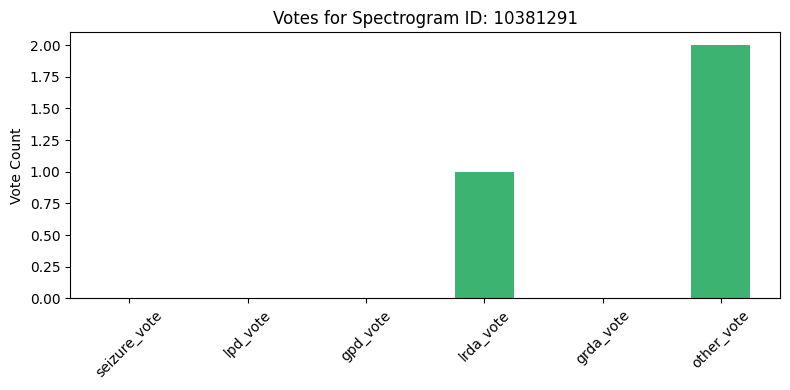

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

📈 Spectrogram ID: 10397461
✅ Predicted Consensus: GPD
🔍 True Consensus: LPD


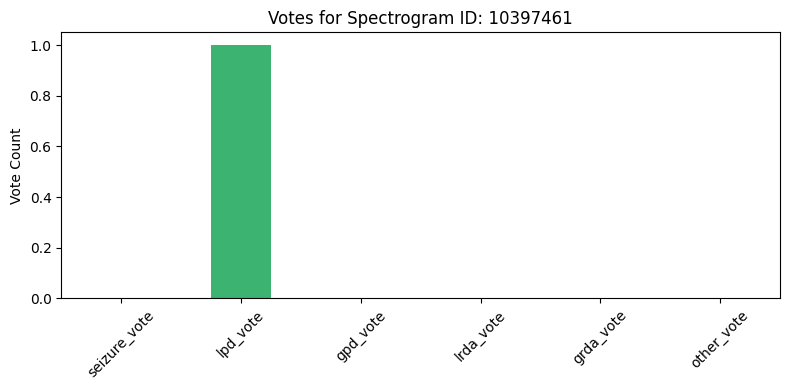

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_cv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from tqdm import tqdm

# Config
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 10

class EEGClassifier:
    def __init__(self, csv_path, spectrogram_dir):
        self.df = pd.read_csv(csv_path)
        self.spectrogram_dir = spectrogram_dir
        self.label_encoder = LabelEncoder()
        self.model = None

    def prepare_data(self):
        self.df['spectrogram_id'] = self.df['spectrogram_id'].astype(str)
        self.df['spectrogram_path'] = self.df['spectrogram_id'].apply(
            lambda x: os.path.join(self.spectrogram_dir, f"{x}.parquet")
        )
        self.df = self.df[self.df['spectrogram_path'].apply(os.path.exists)].reset_index(drop=True)
        self.df['label'] = self.label_encoder.fit_transform(self.df['expert_consensus'])

        # Prepare image and label arrays
        X, y = [], []
        for i, row in tqdm(self.df.iterrows(), total=len(self.df)):
            df_img = pd.read_parquet(row['spectrogram_path'])
            img = df_img.drop(columns=['time']).values
            img = self.preprocess_image(img)
            X.append(img)
            y.append(row['label'])

        X = np.array(X)
        y = to_categorical(np.array(y), num_classes=len(self.label_encoder.classes_))
        return train_test_split(X, y, test_size=0.2, random_state=42)

    def preprocess_image(self, img):
        # Normalize and resize
        img = (img - np.min(img)) / (np.max(img) - np.min(img))  # Normalize to [0, 1]
        img = tf.image.resize(img[..., np.newaxis], [IMG_HEIGHT, IMG_WIDTH])
        img = tf.image.grayscale_to_rgb(img)  # Convert to 3 channels
        return img.numpy()

    def build_model(self):
        base_model = keras_cv.models.EfficientNetV2Backbone.from_preset(
            "efficientnetv2_b0_imagenet",
            load_weights=True
        )
        inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
        x = base_model(inputs)
        x = layers.GlobalAveragePooling2D()(x)
        x = layers.Dense(256, activation="relu")(x)
        x = layers.Dropout(0.3)(x)
        outputs = layers.Dense(len(self.label_encoder.classes_), activation="softmax")(x)
        self.model = tf.keras.Model(inputs, outputs)
        self.model.compile(optimizer=Adam(1e-4), loss="categorical_crossentropy", metrics=["accuracy"])

    def train(self, X_train, X_val, y_train, y_val):
        self.model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val))

    def predict_and_visualize(self, spectrogram_ids):
        vote_columns = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
        for spect_id in spectrogram_ids:
            row = self.df[self.df['spectrogram_id'] == spect_id]
            if row.empty:
                print(f"Spectrogram {spect_id} not found.")
                continue

            img = pd.read_parquet(row['spectrogram_path'].values[0]).drop(columns=['time']).values
            img = self.preprocess_image(img)[np.newaxis, ...]

            pred = self.model.predict(img)
            pred_class = self.label_encoder.inverse_transform([np.argmax(pred)])

            print(f"\n📈 Spectrogram ID: {spect_id}")
            print(f"✅ Predicted Consensus: {pred_class[0]}")
            print(f"🔍 True Consensus: {row['expert_consensus'].values[0]}")

            # Show vote bar chart
            votes = row[vote_columns].iloc[0]
            plt.figure(figsize=(8, 4))
            votes.plot(kind='bar', color='mediumseagreen')
            plt.title(f"Votes for Spectrogram ID: {spect_id}")
            plt.ylabel('Vote Count')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

# === USAGE ===
csv_path = "/kaggle/input/EEGNEW/trainnew.csv"
parquet_dir = "/kaggle/input/EEGNEW/train_spectrograms"

classifier = EEGClassifier(csv_path, parquet_dir)
X_train, X_val, y_train, y_val = classifier.prepare_data()
classifier.build_model()
classifier.train(X_train, X_val, y_train, y_val)

# Predict and visualize for specific IDs
classifier.predict_and_visualize(["10381291", "10397461"])


Loading Spectrograms: 100%|██████████| 5349/5349 [03:07<00:00, 28.54it/s]


35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


E0000 00:00:1747417298.120162     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747417298.301299     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747417298.683075     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747417298.869516     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747417299.060651     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

133/134 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.1598 - loss: nan

E0000 00:00:1747417359.229179     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747417359.411060     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747417359.776375     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747417359.966578     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747417360.153308     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

134/134 ━━━━━━━━━━━━━━━━━━━━ 206s 589ms/step - accuracy: 0.1597 - loss: nan - val_accuracy: 0.1514 - val_loss: nan
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.1468 - loss: nan - val_accuracy: 0.1514 - val_loss: nan
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 129ms/step - accuracy: 0.1584 - loss: nan - val_accuracy: 0.1514 - val_loss: nan
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 129ms/step - accuracy: 0.1576 - loss: nan - val_accuracy: 0.1514 - val_loss: nan
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 129ms/step - accuracy: 0.1396 - loss: nan - val_accuracy: 0.1514 - val_loss: nan
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.1486 - loss: nan - val_accuracy: 0.1514 - val_loss: nan
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.1580 - loss: nan - val_accuracy: 0.1514 - val_loss: nan
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 129ms/step - accuracy: 0.1576 - loss: nan - val_accuracy: 0.1514 - val_loss: nan
Epoch 9/10

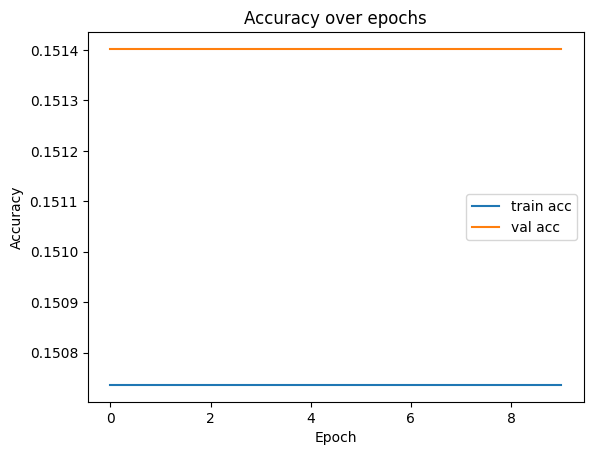

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.applications.efficientnet_v2 import EfficientNetV2B2, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.optimizers import Adam
from tqdm import tqdm

# Paths
CSV_PATH = '/kaggle/input/EEGNEW/trainnew.csv'
PARQUET_DIR = '/kaggle/input/EEGNEW/train_spectrograms'

# Step 1: Load and prepare data
df = pd.read_csv(CSV_PATH)
df['spectrogram_id'] = df['spectrogram_id'].astype(str)
df['spectrogram_path'] = df['spectrogram_id'].apply(
    lambda x: os.path.join(PARQUET_DIR, f"{x}.parquet")
)
df = df[df['spectrogram_path'].apply(os.path.exists)].reset_index(drop=True)

# Step 2: Encode expert_consensus labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['expert_consensus'])
num_classes = len(label_encoder.classes_)

# Step 3: Load and preprocess spectrograms
def load_image(path):
    data = pd.read_parquet(path).drop(columns='time')
    img = data.values.astype(np.float32)
    img = np.stack([img]*3, axis=-1)  # Grayscale to RGB
    img = tf.image.resize(img, [224, 224]).numpy()
    img = preprocess_input(img)
    return img

X = np.array([load_image(p) for p in tqdm(df['spectrogram_path'], desc="Loading Spectrograms")])
y = to_categorical(df['label'].values, num_classes=num_classes)

# Step 4: Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 5: Define model
input_tensor = Input(shape=(224, 224, 3))
base_model = EfficientNetV2B2(include_top=False, input_tensor=input_tensor, weights='imagenet')
x = GlobalAveragePooling2D()(base_model.output)
output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)

model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

# Step 7: Plot training history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 8: Show bar graph of vote breakdown
def show_vote_bar(spectrogram_id):
    row = df[df['spectrogram_id'] == spectrogram_id].iloc[0]
    votes = row[['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']]
    print(f"Spectrogram ID: {spectrogram_id}\nExpert Consensus: {row['expert_consensus']}")
    
    votes.plot(kind='bar', color='skyblue')
    plt.title(f"Votes for Spectrogram ID: {spectrogram_id}")
    plt.ylabel("Vote Count")
    plt.tight_layout()
    plt.show()

# Example usage:
show_vote_bar('10381291')


In [4]:
pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.9 MB/s eta 0:00:000:00:01:03mm
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 101.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.0 MB/s eta 0:00:00:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

# Enable mixed precision for speed and stability
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

# Enable XLA
tf.config.optimizer.set_jit(True)

# Preprocess spectrograms
def preprocess_spectrogram(img):
    img = np.clip(img, 0, np.percentile(img, 99))  # Remove outliers
    img = img / np.max(img)  # Normalize
    img = np.stack([img] * 3, axis=-1)  # Make 3 channels
    img = tf.image.resize(img, (224, 224)).numpy()
    return img.astype(np.float32)

# Load spectrograms and labels
def load_data(csv_path, parquet_dir):
    df = pd.read_csv(csv_path)
    df['spectrogram_id'] = df['spectrogram_id'].astype(str)
    df['spectrogram_path'] = df['spectrogram_id'].apply(lambda x: os.path.join(parquet_dir, f"{x}.parquet"))
    df = df[df['spectrogram_path'].apply(os.path.exists)].reset_index(drop=True)

    X, y = [], []
    for i, row in tqdm(df.iterrows(), total=len(df), desc="Loading Spectrograms"):
        try:
            array = pq.read_table(row['spectrogram_path']).to_pandas().values.astype(np.float32)
            img = preprocess_spectrogram(array)
            X.append(img)
            y.append(row['expert_consensus'])
        except Exception as e:
            print(f"Skipping {row['spectrogram_path']}: {e}")
            continue

    return np.array(X), np.array(y), df

# Plot bar chart of votes
def plot_vote_distribution(row):
    vote_columns = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
    votes = row[vote_columns]
    plt.figure(figsize=(6, 3))
    votes.plot(kind='bar', color='skyblue')
    plt.title(f"Votes - ID: {row['spectrogram_id']} | Label: {row['expert_consensus']}")
    plt.ylim(0, 6)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Build model
def build_model():
    base_model = tf.keras.applications.EfficientNetV2B2(
        include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='avg')

    model = keras.Sequential([
        base_model,
        layers.Dropout(0.3),
        layers.Dense(6, activation='softmax', dtype='float32')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=1e-4, clipnorm=1.0)
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False, label_smoothing=0.1)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

# Main pipeline
def train_pipeline():
    csv_path = "/kaggle/input/EEGNEW/trainnew.csv"
    parquet_dir = "/kaggle/input/EEGNEW/train_spectrograms"

    X, y, full_df = load_data(csv_path, parquet_dir)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    model = build_model()
    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,
        batch_size=32
    )

    # Show votes for a few examples
    for idx in range(5):
        plot_vote_distribution(full_df.iloc[idx])

if __name__ == "__main__":
    train_pipeline()
